# imports

In [1]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'png' #retina
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv("Ames_Housing_Data.csv")

# change features name to lowercase and spaces to underscore, edited to ease during deployment and convenient sake

In [3]:
# Make column labels lowercase
df.columns = map(str.lower, df.columns)

# Replace spaces in columns with underscore
df.columns = df.columns.str.replace('\s+', '_')

In [4]:
df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
print('Data: \n')
print("Number of columns: "+ str(df.shape[1]))
print("Number of rows: "+ str(df.shape[0]))

Data: 

Number of columns: 81
Number of rows: 2930


In [ ]:
df.info()

In [ ]:
df['saleprice'].describe()


skewness: 1.743500


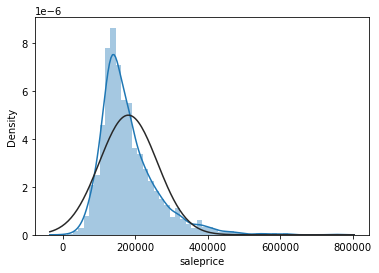

In [8]:
# Kernel Density Plot
sns.distplot(df.saleprice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['saleprice']);

print("skewness: %f" % df['saleprice'].skew());

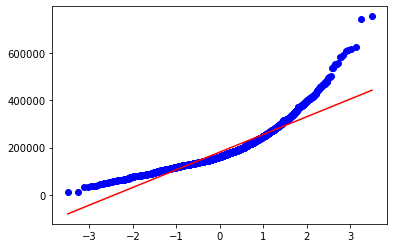

In [9]:
fig = plt.figure()
res = stats.probplot(df['saleprice'], plot=plt)
plt.show()

In [10]:
#since it is right skewed we will use log transformation
#https://gdcoder.com/when-why-to-use-log-transformation-in-regression/


<AxesSubplot:>

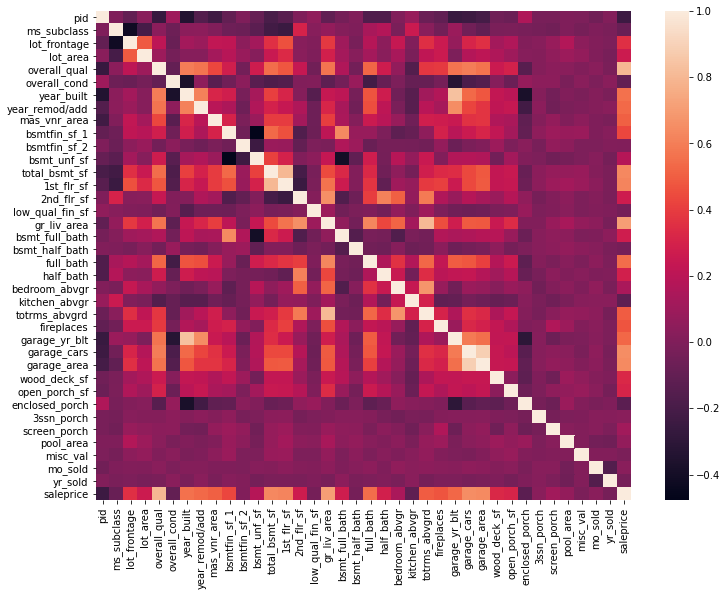

In [11]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

In [12]:
#df.corr()['SalePrice'].sort_values()
a =df.corr()['saleprice'].sort_values(ascending =False).head(10)

print(a)
#print(df.info())

saleprice         1.000000
overall_qual      0.799262
gr_liv_area       0.706780
garage_cars       0.647877
garage_area       0.640401
total_bsmt_sf     0.632280
1st_flr_sf        0.621676
year_built        0.558426
full_bath         0.545604
year_remod/add    0.532974
Name: saleprice, dtype: float64


In [8]:
df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [13]:
#how do we plan to fix skewness?
#remove all outliers or using sqrt/log/box cox
#https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0

In [14]:
#features with categorical dont touch!!
#features with numerical, or ordinal..yes ..try check

# fixing outliers

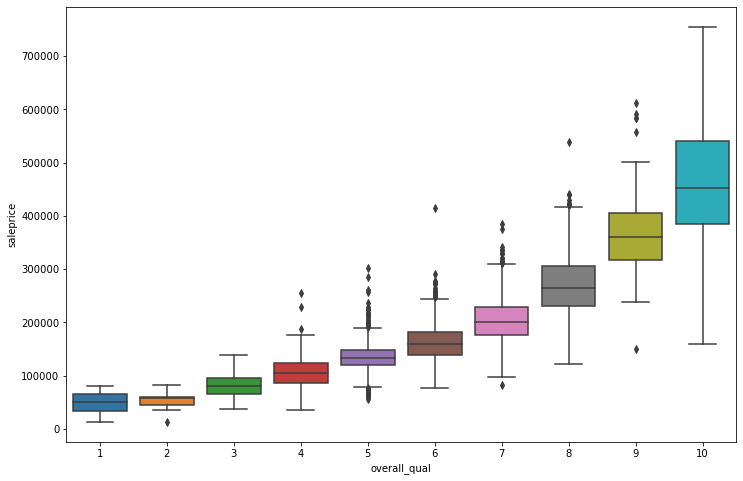

In [15]:
#overall_qual
#doesnt make sense to remove any of the data!!

#box plot overallqual/saleprice
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='overall_qual',y='saleprice')
plt.show()


<AxesSubplot:xlabel='overall_qual', ylabel='saleprice'>

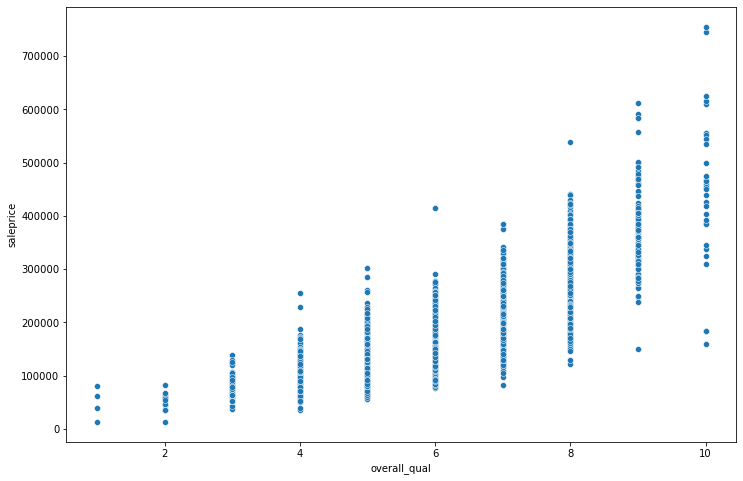

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='overall_qual',y='saleprice',data=df)

<Figure size 1800x900 with 0 Axes>

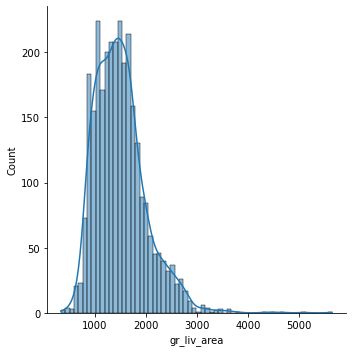

In [17]:
#gr_liv_area
plt.figure(figsize=(20,10),dpi=90)
sns.displot(df['gr_liv_area'],kde=True)
plt.show()

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

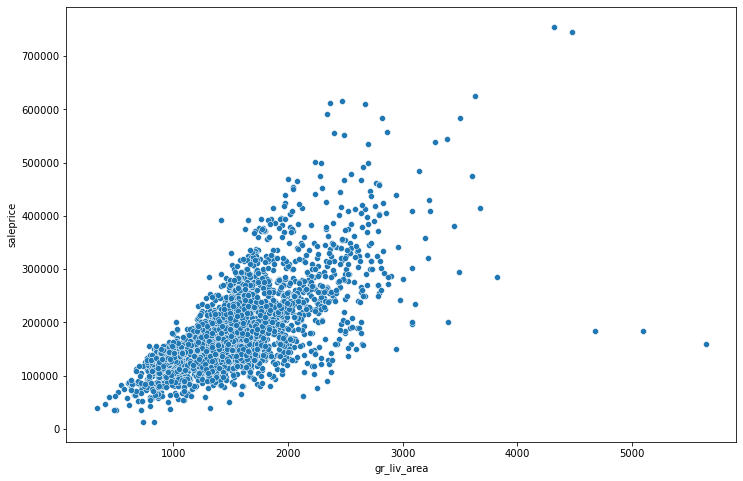

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='gr_liv_area',y='saleprice',data=df)

In [19]:
#remove using visual aid
df = df.drop(df[(df['gr_liv_area']>4000) & (df['gr_liv_area']<400000)].index)

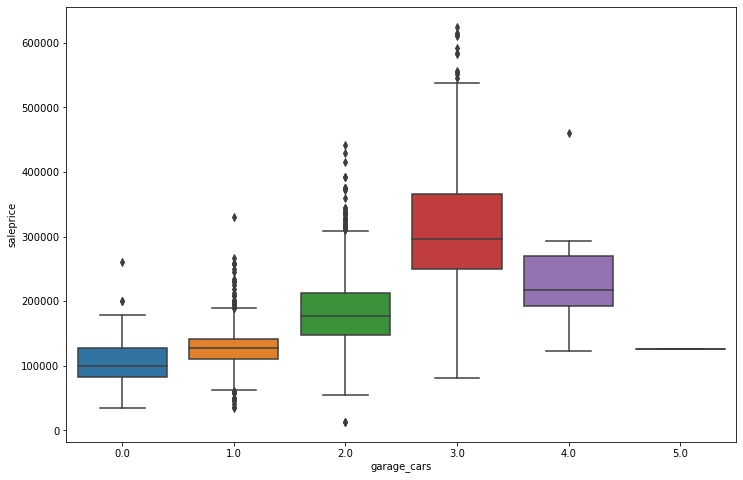

In [20]:
#garage_cars
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='garage_cars',y='saleprice')
plt.show()



<AxesSubplot:xlabel='garage_cars', ylabel='saleprice'>

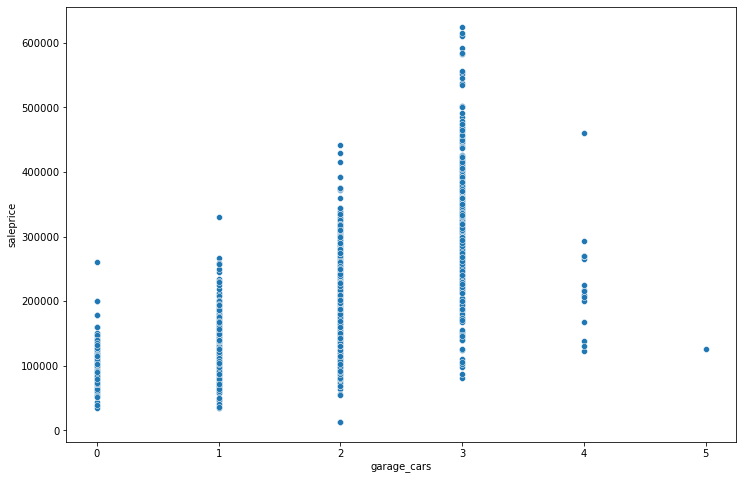

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_cars',y='saleprice',data=df)

<Figure size 1800x900 with 0 Axes>

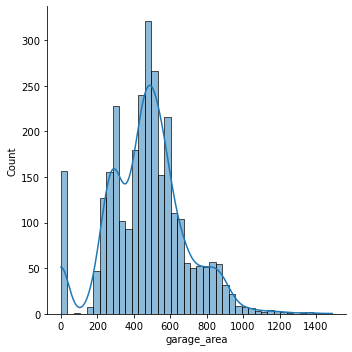

In [22]:
#garage_area
plt.figure(figsize=(20,10),dpi=90)
sns.displot(df['garage_area'],kde=True)
plt.show()

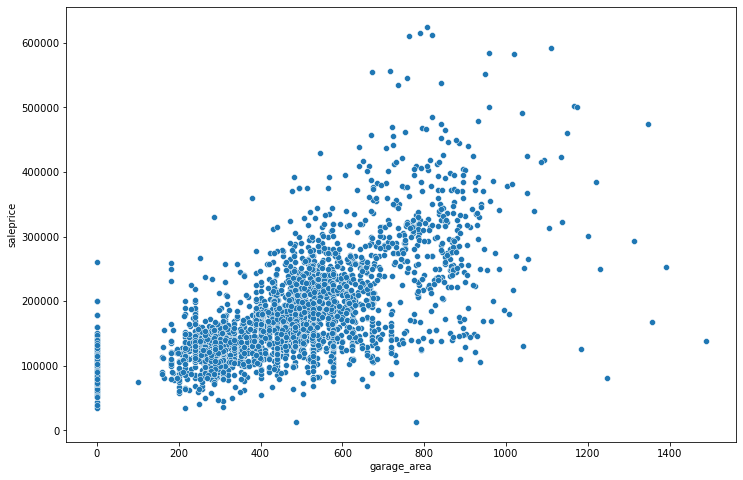

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_area',y='saleprice',data=df)
plt.show()

In [24]:
#remove using visual aid
df = df.drop(df[(df['garage_area']>1200)].index)

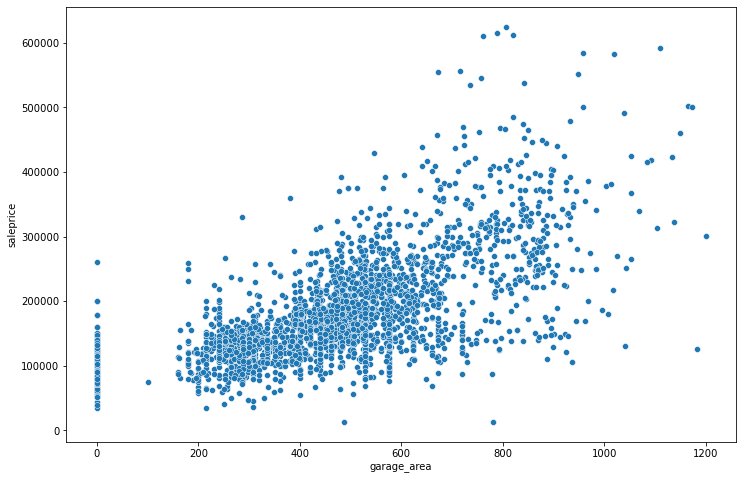

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_area',y='saleprice',data=df)
plt.show()

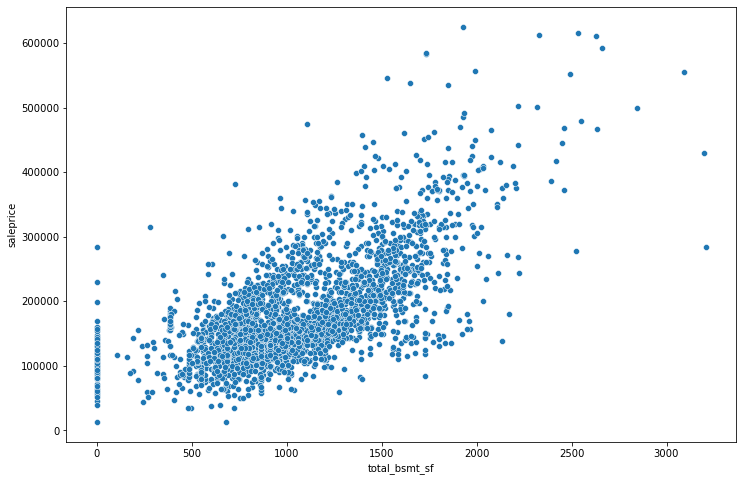

In [26]:
#total_bsmt_sf
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_bsmt_sf',y='saleprice',data=df)
plt.show()

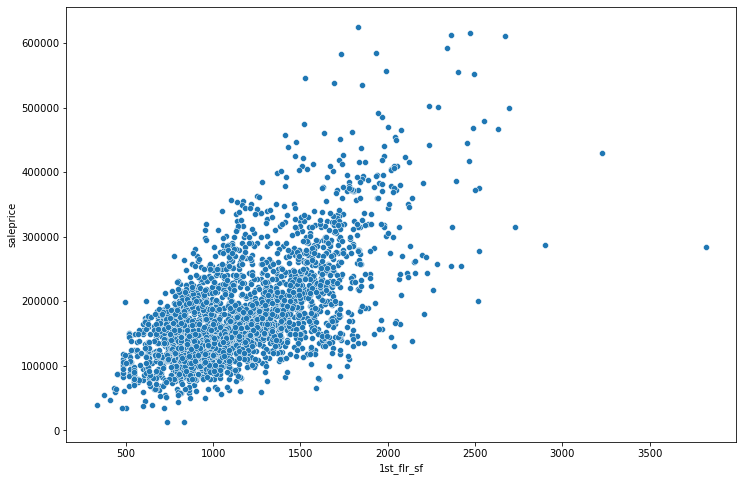

In [27]:
#1st_flr_sf 
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st_flr_sf',y='saleprice',data=df)
plt.show()

In [28]:
#remove using visual aid
df = df.drop(df[(df['1st_flr_sf']>3500)].index)

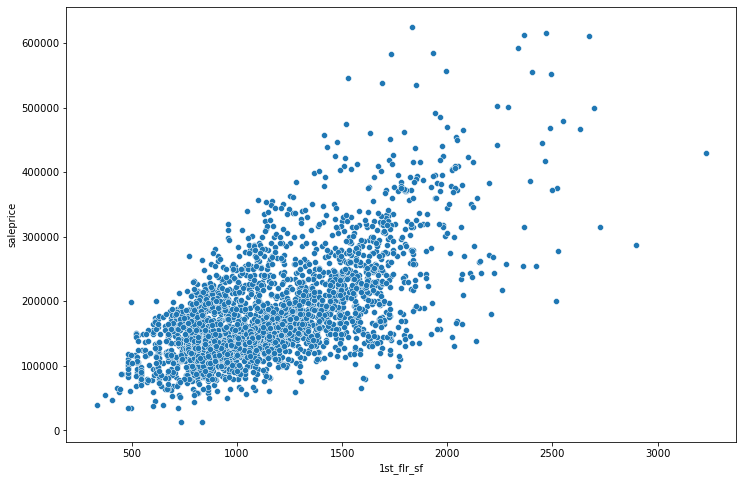

In [29]:
#after
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st_flr_sf',y='saleprice',data=df)
plt.show()

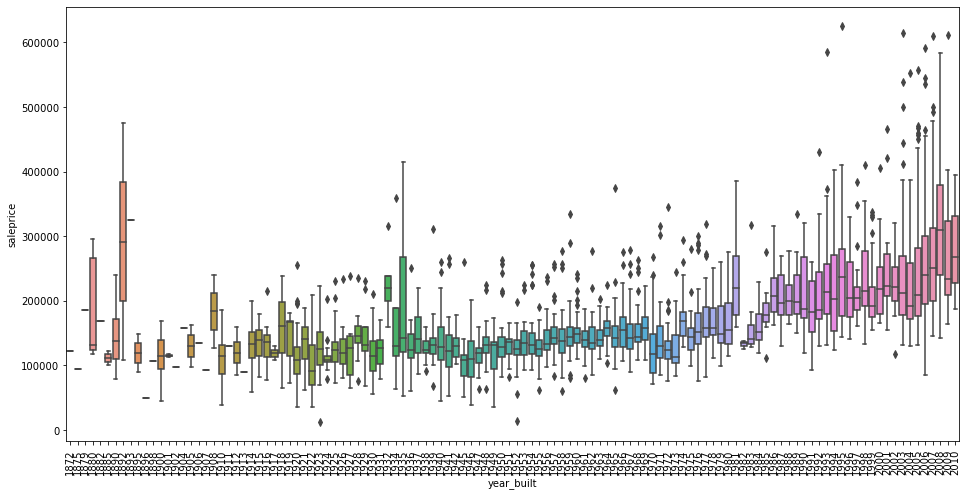

In [30]:
#year_built
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='year_built',y='saleprice')
plt.xticks(rotation=90)
plt.show()

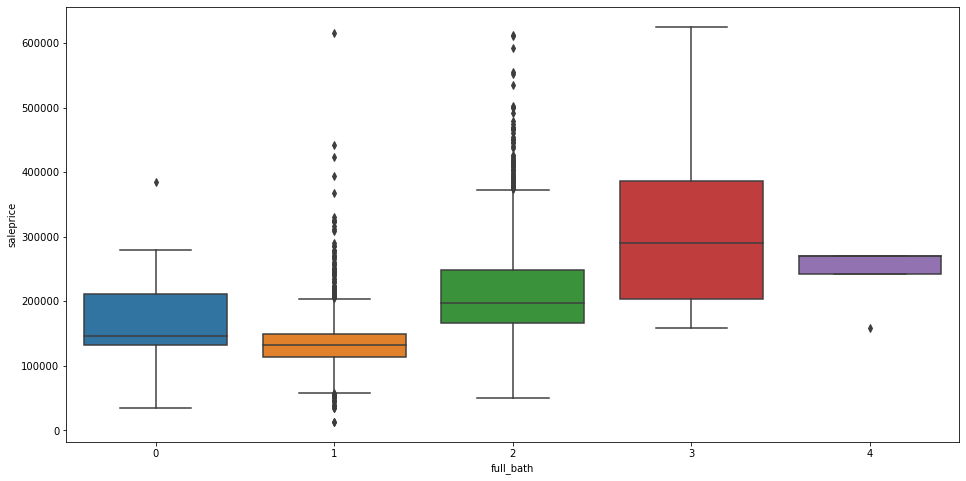

In [31]:
#full_bath
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='full_bath',y='saleprice')
plt.show()

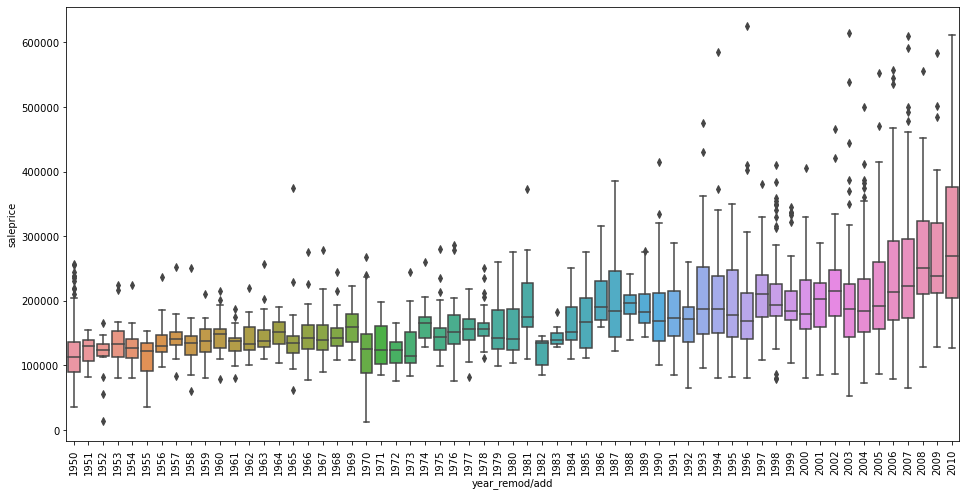

In [32]:
#year_remod/add
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='year_remod/add',y='saleprice')
plt.xticks(rotation=90)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2916 non-null   int64  
 1   ms_subclass      2916 non-null   int64  
 2   ms_zoning        2916 non-null   object 
 3   lot_frontage     2428 non-null   float64
 4   lot_area         2916 non-null   int64  
 5   street           2916 non-null   object 
 6   alley            197 non-null    object 
 7   lot_shape        2916 non-null   object 
 8   land_contour     2916 non-null   object 
 9   utilities        2916 non-null   object 
 10  lot_config       2916 non-null   object 
 11  land_slope       2916 non-null   object 
 12  neighborhood     2916 non-null   object 
 13  condition_1      2916 non-null   object 
 14  condition_2      2916 non-null   object 
 15  bldg_type        2916 non-null   object 
 16  house_style      2916 non-null   object 
 17  overall_qual  

# fixing skewness

In [34]:
#log transform the data saleprice
#df["saleprice"] = np.log1p(df["saleprice"])

In [35]:
df['saleprice'].skew()

1.5951816063706306

In [36]:
df["saleprice"] = np.log1p(df["saleprice"])

In [37]:
df['saleprice'].skew()

-0.04442897877435374

skewness: -0.044429


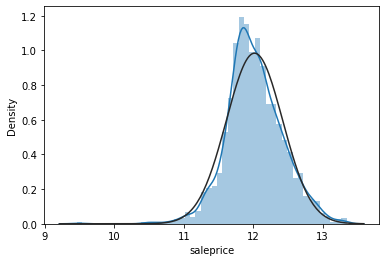

In [38]:
# Kernel Density Plot

sns.distplot(df.saleprice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['saleprice']);

print("skewness: %f" % df['saleprice'].skew());




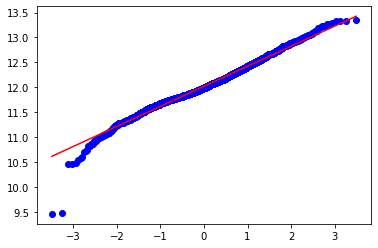

In [41]:
fig = plt.figure()
res = stats.probplot(df['saleprice'], plot=plt)
plt.show()

# save the model

In [40]:
df.to_csv('cs1_part1_res.csv',index=False)